Backwardでも確認してみる

### Frorward-type
- 効用関数：$U_0(x)=(1-\frac{1}{\theta})^{-1}x\left(1-\frac{1}{\theta}\right)$<br><br>
- 上の逆関数：$I_0(y)=y^{-\theta}$<br><br>
- 線形関係式：$I_1(ay)+bI_1(y)=(1+b)I_0(cy),\ y>0.$<br><br>
$a=\frac{1-p}{p}\frac{q}{1-q},\ b=\frac{1-q}{q},\ c=\frac{1-p}{1-q}$<br><br>
- 次の時刻の逆関数：$I_1(y)=\delta y^{-\theta},\ y>0.$<br><br>
$\delta=\frac{1+b}{c^{\theta}(a^{-\theta}+b)}$<br><br>
- 次の時刻の効用関数：$U_1(x)=\delta^{\frac{1}{\theta}}\left(1-\frac{1}{\theta}\right)^{-1}x^{1-\frac{1}{\theta}},\ x>0.$
- 最適投資額：$\pi^*(x)=\frac{\delta\left(\frac{p}{q}\right)-1}{u-1}x,\ x>0.$


### Backward-type
- Value：$V_n=V_{n-1}(1+\pi_n\mu_n)=
\left\{ \begin{array}{}
V_{n-1}(1+\pi_n(u-1)) \\
V_{n-1}(1+\pi_n(d-1))
\end{array}
\right.$
- Wealth：$M^{N-n}\frac{v^{\gamma}}{\gamma}$<br><br>
$\left(\gamma=\left(1-\frac{1}{\theta}\right),\ M=\max_{\pi}\{p(1+\pi(u-1))^{\gamma}+(1-p)(1+\pi(d-1))^{\gamma}\}\right)$<br><br>
- 最適投資比率：$\pi_n^{max}(v)=\frac{K-1}{u-1+K(1-d)}$<br><br>
$K=\left(\frac{p(u-1)}{(1-p)(-d)}\right)^{\frac{1}{1-\gamma}}$<br><br>
- 確実性等価：$y=\sqrt[\gamma]{\gamma x}$

In [1]:
import pandas as pd
import numpy as np
from numpy.random import *
import matplotlib.pyplot as plt
from scipy.special import comb
import math

### Value

In [7]:
def value(N, u, d, pi, default_x):
    val_arr = []
    recursive = []
    for l in range(2**(N+1)):
        for m in range(2):
            recursive.append(l)
    for l in range(N+1):
        val_arr.append([])
        val_arr[l] = [0 for m in range(2**l)]
        if l==0:
            val_arr[l][l]=default_x
        else:
            for n in range(len(val_arr[l])):
                if (n+1)%2!=0:
                    val_arr[l][n] = val_arr[l-1][recursive[n]]*(1+pi*(u-1))
                if (n+1)%2==0:
                    val_arr[l][n] = val_arr[l-1][recursive[n]]*(1+pi*(d-1))

    return val_arr

In [14]:
value(3, 1.2, 0.8, 0.4, 100)

[[100],
 [108.0, 92.0],
 [116.64000000000001, 99.36, 99.36000000000001, 84.64],
 [125.97120000000002,
  107.30880000000002,
  107.3088,
  91.41120000000001,
  107.30880000000002,
  91.41120000000002,
  91.41120000000001,
  77.86880000000001]]

### Backward

In [3]:
def backward(N, theta, u, d, p, price_x, default_x):
    gamma = (1-1/theta)
    K = (p*(u-1)/((1-p)*(1-d)))**(1/(1-gamma))
    pi = (K-1)/(u-1+K*(1-d))
    M = p*(1+pi*(u-1))**(1-(1/theta))+(1-p)*(1+pi*(d-1))**(1-(1/theta))
    val = value(N+1, u, d, pi, default_x)
    
    num = [ i for i in range(N+1)]
    stock = [[ [] for i in range(N+1) ] for j in range(N+1)]
    
    #⇡リスト内包表記のほうが速いらしい         
    #for i in range(N+1):
    #    stock.append([])
    #    for j in range(0,N+1):
    #        stock[i].append([])
     
    for i in range(N+1):
        for j in range(N+1):
            #index
            stock[i][0] = i
            #node_num
            stock[i][1] = num[0:i+1]
            #up_times
            stock[i][2] = num[i::-1]
            #down_times
            stock[i][3] = num[0:i+1]
            #theta
            stock[i][4] = theta
            #prob
            stock[i][5] = p
            #up_r
            stock[i][6] = list(map(lambda x: 0 if x==0 else u**x, num[0:i+1]))
            #down_r
            stock[i][7] = list(map(lambda x: 0 if x==0 else d**x, num[i::-1]))
            #price
            stock[i][8] = list(map(lambda x, y: price_x if x==0 and y==0 else (price_x*x)+(price_x*y) if x==0 or y==0 else (price_x*x*y), stock[i][6], stock[i][7]))
            #value
            stock[i][9] = val[i]

            #Wealth
            stock[i][10] = list(map(lambda x: (M**((10)-i))*((1-(1/theta))**(-1))*(x)**(1-(1/theta)), stock[i][9]))
            
            #Utility
            stock[i][11] = list(map(lambda x: (1-1/theta)**(-1)*x**(1-1/theta), stock[i][9]))
            #Exp_value
            
            stock[i][12] = list(map(lambda  l, m, n : comb(i, l, exact=True)*(p**l)*((1-p)**m)*n if (l!=0 and m!=0) \
                                 else (p**l)*n if m==0 \
                                 else ((1-p)**m)*n if l==0 \
                                 else nan \
                                , stock[i][2], stock[i][3], stock[i][11]))
            
            stock[i][13] = list(map(lambda  l, m, n : comb(i, l, exact=True)*(p**l)*((1-p)**m)*n if (l!=0 and m!=0) \
                                 else (p**l)*n if m==0 \
                                 else ((1-p)**m)*n if l==0 \
                                 else nan \
                                , stock[i][2], stock[i][3], stock[i][10]))
    df = pd.DataFrame(stock)
    df = df.set_index(0)
    df.columns = ["node_num", "up_times", "down_times", "theta", "prob", "up_r", "down_r", "price", "value", "wealth", "utility", "Exp_val", "Wn"]
    
    
    return df["Exp_val"][10]#np.sum(df["Exp_val"][10]), df["wealth"][0][0], math.pow(df["wealth"][0][0]*(1-(1/theta)), 1/(1-(1/theta)))

### Forward

In [28]:
def delta (theta, a, b, c):
    return ((1+b)/((c**(theta))*((a**(-theta))+b)))

In [29]:
def forward(N, theta, u, d, p, default_x):

    seed(123)

    q = (1-d)/(u-d)
    a = ((1-p)/p)*(q/(1-q))
    b = (1-q)/q
    c = (1-p)/(1-q)

    num = [ i for i in range(N+1)]
    stock = [[ [] for i in range(N+1) ] for j in range(N+1)]
    
    pi = (delta(theta, a, b, c)*((p/q)**(theta))-1)/(u-1)
    M = p*(1+pi*(u-1))**(1-(1/theta))+(p-1)*(1+pi*(d-1))**(1-(1/theta))
    val = value(N+1, u, d, pi, default_x)
    
    for i in range(N+1):
        for j in range(N+1):
            #index
            stock[i][0] = i
            #node_num
            stock[i][1] = num[0:i+1]
            #up_times
            stock[i][2] = num[i::-1]
            #down_times
            stock[i][3] = num[0:i+1]
            #theta
            stock[i][4] = theta
            #u
            stock[i][5] = u
            #+(0.1*random()) if i>1 else u if i==1  else 0
            #d
            stock[i][6] = d
            #+(0.1*random()) if i>1 else d if i==1  else 0
            #p
            stock[i][7] = p
            #q
            stock[i][8] = (1-stock[i][6])/(stock[i][5]-stock[i][6]) if i>1 else q if i==1  else 0
            #a
            stock[i][9] = ((1-stock[i][7])/stock[i][7])*(stock[i][8]/(1-stock[i][8])) if i>1 else a if i==1 else 0
            #b
            stock[i][10] = ((1-stock[i][8])/stock[i][8]) if i>1 else b if i==1 else 0
            #c
            stock[i][11] = ((1-stock[i][7])/(1-stock[i][8])) if i>1 else c if i==1 else 0
            #pi
            stock[i][12] = (delta(theta, stock[i][9], stock[i][10], stock[i][11])*((stock[i][7]/stock[i][8])**(theta))-1)/(stock[i][5]-1) if i>1 else pi if i==1 else 0
            #price
            #stock[i][10] = list(map(lambda x, y: default_x if x==0 and y==0 else (default_x*x)+(default_x*y) if x==0 or y==0 else (default_x*x)*(default_x*y), stock[i][8], stock[i][9]))            
            #value
            stock[i][13] = val[i]
            #Wealth
            #プログラム上、ここのNを10にして10期間にしている
            stock[i][14] = list(map(lambda x: (M**(10-i))*((1/(1-theta))**(-1))*(x)**(1-(1/theta)), stock[i][13]))
            #U_0
            stock[i][15] = list(map(lambda x: ((1-(1/theta))**(-1))*(x**(1-(1/theta))), stock[i][13]))
            #I_0
            #stock[i][10] = list(map(lambda x: (x**(-1/theta))**(-1), stock[i][8]))
            #I_1
            #stock[i][11] = list(map(lambda x: (1+b)/((c**theta)*((a**(-theta))+b)*x, stock[i][10]))
            #U_1
            stock[i][16] = list(map(lambda x: (((1+b)/((c**(theta))*((a**(-theta))+b)))**(1/theta))*x, stock[i][15]))
            #pi
            #stock[i][14] = list(map(lambda x: ((((1+b)/((c**theta)*((a**(-theta))+b)))*((p/q)**theta)-1)/(u-1))*x, stock[i][13]))
            #Exp[U_1]
            stock[i][17] = list(map(lambda  l, m, n : comb(i, l, exact=True)*(p**l)*((1-p)**m)*n if (l!=0 and m!=0) \
                                 else (p**l)*n if m==0 \
                                 else ((1-p)**m)*n if l==0 \
                                 else nan \
                                 , stock[i][2], stock[i][3], stock[i][16]))
           
            
    df = pd.DataFrame(stock)
    df = df.set_index(0)
    df.columns = ["node_num", "up_times", "down_times", "theta", "u", "d", "p", "q", "a", "b", "c", "pi", "value", "wealth", "U_0", "U_1", "Exp_U1"]
    
    return df["Exp_U1"][10]
    

#### parameter：$(\theta, u, d, p)=(1.2, 1.2, 0.8, 0.4)$

In [30]:
default_arr = []

for i in range(1, 11):
    default_arr.append(500*i)
    forward_type = [list(map(lambda x: x, default_arr)), list(map(lambda x: np.sum(forward(17, 1.2, 1.2, 0.8, 0.4, x)), default_arr))]

fw = pd.DataFrame(forward_type).T
fw.columns = ["default", "Exp_u1"]

fw_x = fw["default"]
fw_y = fw["Exp_u1"]

for i in range(1, 11):
    backward_type = [list(map(lambda x: x, default_arr)), list(map(lambda x: np.sum(backward(13, 1.2, 1.2, 0.8, 0.4, 100, x)), default_arr))]

bk = pd.DataFrame(backward_type).T
bk.columns = ["default", "Exp_u1"]

bk_x = bk["default"]
bk_y = bk["Exp_u1"]

plt.figure(figsize=(20,10))
plt.plot(fw_x, fw_y, label = "forward")
plt.plot(bk_x, bk_y, label = "backward")

plt.title("theta=3.0")
plt.xlabel("default_val")
plt.ylabel("last_u1_exp")
plt.legend()
plt.show()

TypeError: 'float' object is not iterable

In [103]:
tmp(13, 1.2, 1.2, 0.8, 0.4, 100, 500)

(12.610112008342718, 17.595191215478565, 635.999014962574)

#### parameter：$(\theta, u, d, p)=(2.0, 1.2, 0.8, 0.4)$

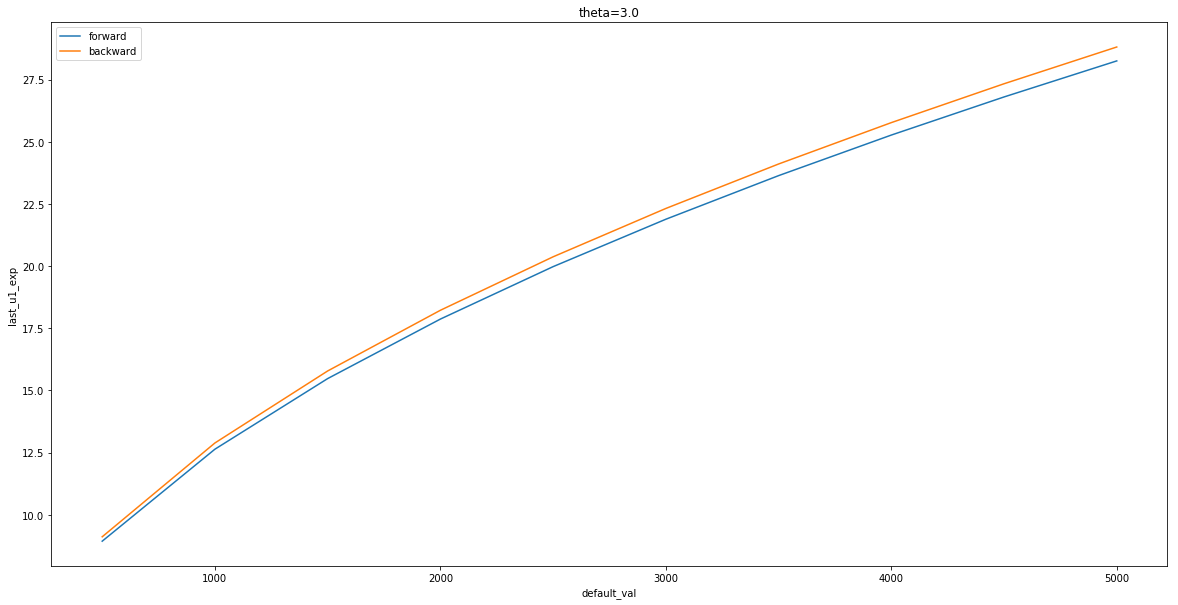

In [92]:
default_arr = []

for i in range(1, 11):
    default_arr.append(500*i)
    forward_type = [list(map(lambda x: x, default_arr)), list(map(lambda x: np.sum(forward(17, 2.0, 1.2, 0.8, 0.4, x)), default_arr))]

fw = pd.DataFrame(forward_type).T
fw.columns = ["default", "Exp_u1"]

fw_x = fw["default"]
fw_y = fw["Exp_u1"]

for i in range(1, 11):
    backward_type = [list(map(lambda x: x, default_arr)), list(map(lambda x: np.sum(backward(13, 2.0, 1.2, 0.8, 0.4, 100, x)), default_arr))]

bk = pd.DataFrame(backward_type).T
bk.columns = ["default", "Exp_u1"]

bk_x = bk["default"]
bk_y = bk["Exp_u1"]

plt.figure(figsize=(20,10))
plt.plot(fw_x, fw_y, label = "forward")
plt.plot(bk_x, bk_y, label = "backward")

plt.title("theta=3.0")
plt.xlabel("default_val")
plt.ylabel("last_u1_exp")
plt.legend()
plt.show()

In [102]:
tmp(13, 2.0, 1.2, 0.8, 0.4, 100, 500)

(9.110401455565007, 54.41037189577638, 740.122142459173)

#### parameter：$(\theta, u, d, p)=(3.0, 1.2, 0.8, 0.4)$

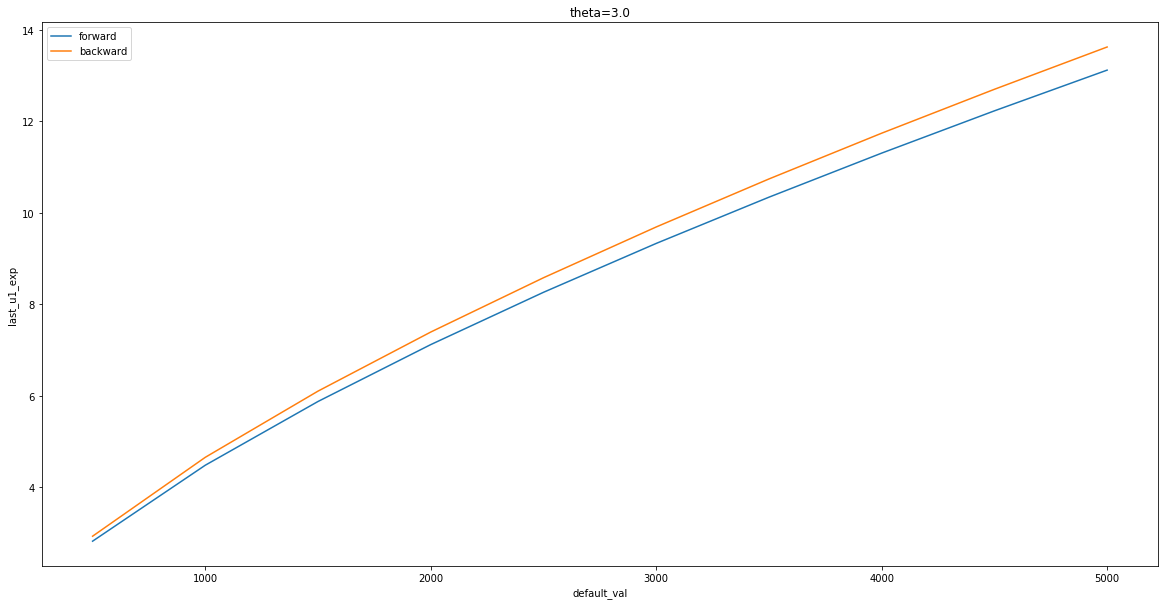

In [91]:
default_arr = []

for i in range(1, 11):
    default_arr.append(500*i)
    forward_type = [list(map(lambda x: x, default_arr)), list(map(lambda x: np.sum(forward(17, 3.0, 1.2, 0.8, 0.4, x)), default_arr))]

fw = pd.DataFrame(forward_type).T
fw.columns = ["default", "Exp_u1"]

fw_x = fw["default"]
fw_y = fw["Exp_u1"]

for i in range(1, 11):
    backward_type = [list(map(lambda x: x, default_arr)), list(map(lambda x: np.sum(backward(13, 3.0, 1.2, 0.8, 0.4, 100, x)), default_arr))]

bk = pd.DataFrame(backward_type).T
bk.columns = ["default", "Exp_u1"]

bk_x = bk["default"]
bk_y = bk["Exp_u1"]

plt.figure(figsize=(20,10))
plt.plot(fw_x, fw_y, label = "forward")
plt.plot(bk_x, bk_y, label = "backward")

plt.title("theta=3.0")
plt.xlabel("default_val")
plt.ylabel("last_u1_exp")
plt.legend()
plt.show()

In [17]:
def tmp(N, theta, u, d, p, price_x, default_x):
    gamma = (1-1/theta)
    K = (p*(u-1)/((1-p)*(1-d)))**(1/(1-gamma))
    pi = (K-1)/(u-1+K*(1-d))
    M = p*(1+pi*(u-1))**(1-(1/theta))+(1-p)*(1+pi*(d-1))**(1-(1/theta))
    val = value(N+1, u, d, pi, default_x)
    
    num = [ i for i in range(N+1)]
    stock = [[ [] for i in range(N+1) ] for j in range(N+1)]
    
    #⇡リスト内包表記のほうが速いらしい         
    #for i in range(N+1):
    #    stock.append([])
    #    for j in range(0,N+1):
    #        stock[i].append([])
     
    for i in range(N+1):
        for j in range(N+1):
            #index
            stock[i][0] = i
            #node_num
            stock[i][1] = num[0:i+1]
            #up_times
            stock[i][2] = num[i::-1]
            #down_times
            stock[i][3] = num[0:i+1]
            #theta
            stock[i][4] = theta
            #prob
            stock[i][5] = p
            #up_r
            stock[i][6] = list(map(lambda x: 0 if x==0 else u**x, num[0:i+1]))
            #down_r
            stock[i][7] = list(map(lambda x: 0 if x==0 else d**x, num[i::-1]))
            #price
            stock[i][8] = list(map(lambda x, y: price_x if x==0 and y==0 else (price_x*x)+(price_x*y) if x==0 or y==0 else (price_x*x*y), stock[i][6], stock[i][7]))
            #value
            stock[i][9] = val[i]

            #Wealth
            stock[i][10] = list(map(lambda x: (M**((10)-i))*((1-(1/theta))**(-1))*(x)**(1-(1/theta)), stock[i][9]))
            
            #Utility
            stock[i][11] = list(map(lambda x: (1-1/theta)**(-1)*x**(1-1/theta), stock[i][9]))
            #Exp_value
            
            stock[i][12] = list(map(lambda  l, m, n : comb(i, l, exact=True)*(p**l)*((1-p)**m)*n if (l!=0 and m!=0) \
                                 else (p**l)*n if m==0 \
                                 else ((1-p)**m)*n if l==0 \
                                 else nan \
                                , stock[i][2], stock[i][3], stock[i][11]))
            
            stock[i][13] = list(map(lambda  l, m, n : comb(i, l, exact=True)*(p**l)*((1-p)**m)*n if (l!=0 and m!=0) \
                                 else (p**l)*n if m==0 \
                                 else ((1-p)**m)*n if l==0 \
                                 else nan \
                                , stock[i][2], stock[i][3], stock[i][10]))
    df = pd.DataFrame(stock)
    df = df.set_index(0)
    df.columns = ["node_num", "up_times", "down_times", "theta", "prob", "up_r", "down_r", "price", "value", "wealth", "utility", "Exp_val", "Wn"]
    
    
    return np.sum(df["Exp_val"][10]), df["wealth"][0][0], math.pow(df["Wn"][0][0]*(1-(1/theta)), 1/(1-(1/theta)))

In [18]:
tmp(13, 2.0, 1.2, 0.8, 0.4, 100, 500)

TypeError: 'float' object is not iterable

In [19]:
def backward(N, theta, u, d, p, price_x, default_x):
    gamma = (1-1/theta)
    K = (p*(u-1)/((1-p)*(1-d)))**(1/(1-gamma))
    pi = (K-1)/(u-1+K*(1-d))
    M = p*(1+pi*(u-1))**(1-(1/theta))+(1-p)*(1+pi*(d-1))**(1-(1/theta))
    val = value(N+1, u, d, pi, default_x)
    
    num = [ i for i in range(N+1)]
    stock = [[ [] for i in range(N+1) ] for j in range(N+1)]
    
    #⇡リスト内包表記のほうが速いらしい         
    #for i in range(N+1):
    #    stock.append([])
    #    for j in range(0,N+1):
    #        stock[i].append([])
     
    for i in range(N+1):
        for j in range(N+1):
            #index
            stock[i][0] = i
            #node_num
            stock[i][1] = num[0:i+1]
            #up_times
            stock[i][2] = num[i::-1]
            #down_times
            stock[i][3] = num[0:i+1]
            #theta
            stock[i][4] = theta
            #prob
            stock[i][5] = p
            #up_r
            stock[i][6] = list(map(lambda x: 0 if x==0 else u**x, num[0:i+1]))
            #down_r
            stock[i][7] = list(map(lambda x: 0 if x==0 else d**x, num[i::-1]))
            #price
            stock[i][8] = list(map(lambda x, y: price_x if x==0 and y==0 else (price_x*x)+(price_x*y) if x==0 or y==0 else (price_x*x*y), stock[i][6], stock[i][7]))
            #value
            stock[i][9] = val[i]

            #Wealth
            stock[i][10] = list(map(lambda x: (M**((10)-i))*((1-(1/theta))**(-1))*(x)**(1-(1/theta)), stock[i][9]))
            
            #Utility
            stock[i][11] = list(map(lambda x: (1-1/theta)**(-1)*x**(1-1/theta), stock[i][9]))
            #Exp_value
            
            stock[i][12] = list(map(lambda  l, m, n : comb(i, l, exact=True)*(p**l)*((1-p)**m)*n if (l!=0 and m!=0) \
                                 else (p**l)*n if m==0 \
                                 else ((1-p)**m)*n if l==0 \
                                 else nan \
                                , stock[i][2], stock[i][3], stock[i][11]))
            
            stock[i][13] = list(map(lambda  l, m, n : comb(i, l, exact=True)*(p**l)*((1-p)**m)*n if (l!=0 and m!=0) \
                                 else (p**l)*n if m==0 \
                                 else ((1-p)**m)*n if l==0 \
                                 else nan \
                                , stock[i][2], stock[i][3], stock[i][10]))
    df = pd.DataFrame(stock)
    df = df.set_index(0)
    df.columns = ["node_num", "up_times", "down_times", "theta", "prob", "up_r", "down_r", "price", "value", "wealth", "utility", "Exp_val", "Wn"]
    
    
    return df["Exp_val"][10]#np.sum(df["Exp_val"][10]), df["wealth"][0][0], math.pow(df["wealth"][0][0]*(1-(1/theta)), 1/(1-(1/theta)))

In [24]:
backward(10, 1.2, 1.2, 0.8, 0.4, 100, 100)

TypeError: 'float' object is not iterable